In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress
from sklearn.utils import resample
import seaborn as sns
import statsmodels.api as sm
import pylab

In [35]:
raw=np.loadtxt('babies.txt', skiprows=1)

In [36]:
ta1=pd.DataFrame(raw)

In [37]:
ta1.columns=['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke']

In [38]:
#Detect outliers and delete the data
ta1=ta1.drop(ta1[ta1['weight']==999].index)
ta1=ta1.drop(ta1[ta1['smoke']==9].index)
ta1=ta1.drop(ta1[ta1['gestation']==999].index)
ta1=ta1.drop(ta1[ta1['height']==99].index)
ta1=ta1.drop(ta1[ta1['age']==99].index)

In [39]:
ta1

,bwt,gestation,parity,age,height,weight,smoke
0,120.0,284.0,0.0,27.0,62.0,100.0,0.0
1,113.0,282.0,0.0,33.0,64.0,135.0,0.0
2,128.0,279.0,0.0,28.0,64.0,115.0,1.0
4,108.0,282.0,0.0,23.0,67.0,125.0,1.0
5,136.0,286.0,0.0,25.0,62.0,93.0,0.0
6,138.0,244.0,0.0,33.0,62.0,178.0,0.0
7,132.0,245.0,0.0,23.0,65.0,140.0,0.0
8,120.0,289.0,0.0,25.0,62.0,125.0,0.0
9,143.0,299.0,0.0,30.0,66.0,136.0,1.0
10,140.0,351.0,0.0,27.0,68.0,120.0,0.0


In [40]:
stat=ta1.describe()
stat[['bwt','gestation']]

,bwt,gestation
count,1174.000000,1174.000000
mean,119.462521,279.101363
std,18.328671,16.010305
min,55.000000,148.000000
25%,108.000000,272.000000
50%,120.000000,280.000000
75%,131.000000,288.000000
max,176.000000,353.000000


In [41]:
t=ta1.drop(['smoke','parity'],1)

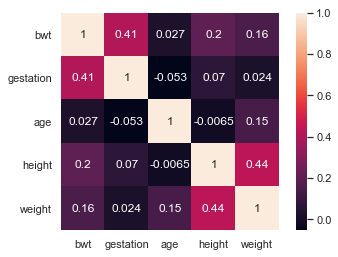

In [42]:
cor=t.corr()
sns.heatmap(cor,square=True,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4D6ACCA20>,
      dtype=object)

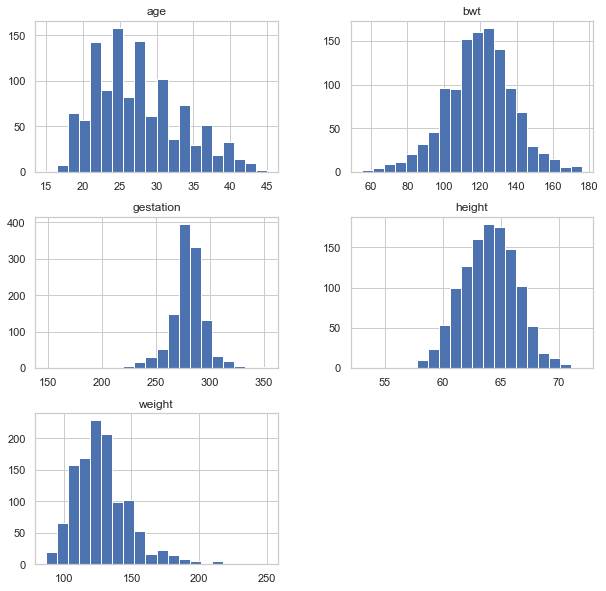

In [43]:
#Histogram for numeric data
t.hist(bins=20,figsize=(10,10))

Pearson correlation formula:
$ r = \frac{N\sum{XY}-(\sum{X}\sum{Y})}{\sqrt{ (N \sum{x^2}-(\sum{x})^2 )(N \sum{y^2}-(\sum{y})^2 })} $

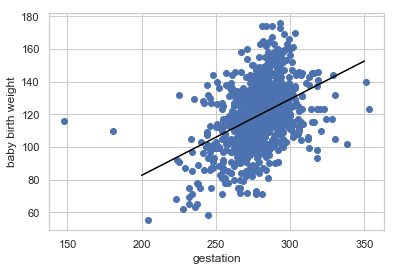

In [44]:
plt.scatter(ta1['gestation'],ta1['bwt'])
plt.xlabel('gestation')
plt.ylabel('baby birth weight')
r=linregress(ta1['gestation'],ta1['bwt'])
x=np.linspace(200,350)
a=r.slope
b=r.intercept
plt.plot(x,a*x+b,color='black')
plt.savefig('ges-bwt.jpg')

In [45]:
#Boxplot of relation between smoke and bwt
sns.set(style='whitegrid')

In [46]:
#Histogram and distribution simulation of birth weight, smoke=1
smoke=ta1[ta1['smoke']==1]
Non_smoke=ta1[ta1['smoke']==0]
smoke_bwt=smoke['bwt']
Non_smoke_bwt=Non_smoke['bwt']

Text(0.5, 0, 'birthweight')

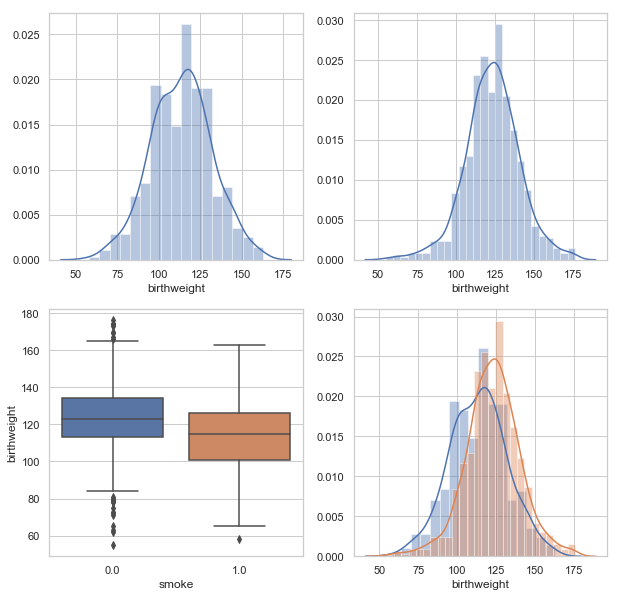

In [47]:
#Histogram and distribution simulation of birth weight, smoke=0
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
sns.distplot(smoke['bwt'],ax=ax1)
ax1.set_xlabel('birthweight')
ax2=fig.add_subplot(222)
sns.distplot(Non_smoke['bwt'],ax=ax2)
ax2.set_xlabel('birthweight')
ax3=fig.add_subplot(223)
sns.boxplot(x='smoke',y='bwt',data=ta1,ax=ax3)
ax3.set_ylabel('birthweight')
ax4=fig.add_subplot(224)
sns.distplot(smoke_bwt,ax=ax4)
sns.distplot(Non_smoke_bwt,ax=ax4)
ax4.set_xlabel('birthweight')

In [34]:
#Bootstrap calculate kurtosis and skewness
kurt0=[]
skew0=[]
kurt1=[]
skew1=[]
for i in range(1000):
    boot_smoke_bwt=resample(smoke_bwt)
    boot_non_smoke_bwt=resample(Non_smoke_bwt)
    kurt0.append(stats.kurtosis(boot_smoke_bwt,fisher=True))
    skew0.append(stats.skew(boot_smoke_bwt))
    kurt1.append(stats.kurtosis(boot_non_smoke_bwt,fisher=True))
    skew1.append(stats.skew(boot_non_smoke_bwt))

In [38]:
print('kurtosis for smoke: ', np.mean(kurt0),'\nskewness for smoke: ',np.mean(skew0))
print('kurtosis for Non-smoke: ', np.mean(kurt1),'\nskewness for Non-smoke: ',np.mean(skew1))

kurtosis for smoke:  -0.27538191888062186 
skewness for smoke:  0.12499446104863929
kurtosis for Non-smoke:  0.1474462868258574 
skewness for Non-smoke:  -0.1699514847256358


Text(0.5, 1.0, 'gestation')

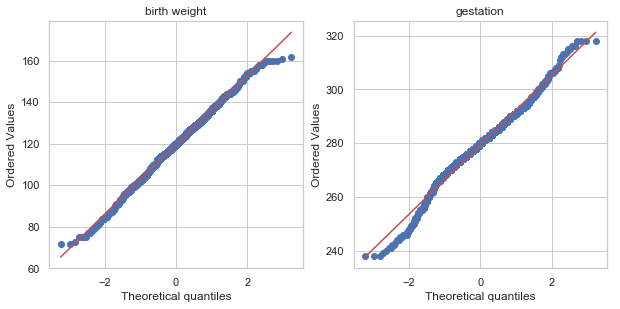

In [20]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(221)
stats.probplot(ta1['bwt'],dist=norm,plot=ax1)
ax1.set_title('birth weight')
ax2=fig.add_subplot(222)
stats.probplot(ta1['gestation'],dist=norm,plot=ax2)
ax2.set_title('gestation')

In [21]:
#Divide gestation group into 4 groups and compare the influence of smoke 
#over birth weight
minimum=int(stat['gestation']['min'])
q1=int(stat['gestation']['25%'])
mean=int(stat['gestation']['50%'])
q3=int(stat['gestation']['75%'])
maximum=int(stat['gestation']['max'])

g1=ta1[ta1['gestation']<q1]
g2=ta1[ta1['gestation']>=q1]
g2=g2[g2['gestation']<=mean]
g3=ta1[ta1['gestation']>mean]
g3=g3[g3['gestation']<=q3]
g4=ta1[ta1['gestation']>q3]

In [ ]:
def bootstrap(x):
    for i in range(1000):
        
        

In [28]:
#Dataset 2
rw=np.loadtxt('baby123.txt',skiprows=1)

In [35]:
ta2=pd.DataFrame(rw)
ta2.columns=['id',  'pluralty', 'outcome', 'date', 'gestation', 'sex', 'wt', 'parity', 
             'race', 'age', 'ed', 'ht', 'wt', 'drace', 'dage', 'ded','dht', 'dwt', 'marital', 
             'inc', 'smoke', 'time', 'number']

In [36]:
ta2

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15.0,5.0,1.0,1411.0,284.0,1.0,120.0,1.0,8.0,27.0,...,8.0,31.0,5.0,65.0,110.0,1.0,1.0,0.0,0.0,0.0
1,20.0,5.0,1.0,1499.0,282.0,1.0,113.0,2.0,0.0,33.0,...,0.0,38.0,5.0,70.0,148.0,1.0,4.0,0.0,0.0,0.0
2,58.0,5.0,1.0,1576.0,279.0,1.0,128.0,1.0,0.0,28.0,...,5.0,32.0,1.0,99.0,999.0,1.0,2.0,1.0,1.0,1.0
3,61.0,5.0,1.0,1504.0,999.0,1.0,123.0,2.0,0.0,36.0,...,3.0,43.0,4.0,68.0,197.0,1.0,8.0,3.0,5.0,5.0
4,72.0,5.0,1.0,1425.0,282.0,1.0,108.0,1.0,0.0,23.0,...,0.0,24.0,5.0,99.0,999.0,1.0,1.0,1.0,1.0,5.0
5,100.0,5.0,1.0,1673.0,286.0,1.0,136.0,4.0,0.0,25.0,...,3.0,28.0,2.0,64.0,130.0,1.0,4.0,2.0,2.0,2.0
6,102.0,5.0,1.0,1449.0,244.0,1.0,138.0,4.0,7.0,33.0,...,7.0,37.0,4.0,99.0,999.0,1.0,98.0,0.0,0.0,0.0
7,129.0,5.0,1.0,1562.0,245.0,1.0,132.0,2.0,7.0,23.0,...,7.0,23.0,4.0,71.0,192.0,1.0,2.0,0.0,0.0,0.0
8,142.0,5.0,1.0,1408.0,289.0,1.0,120.0,3.0,0.0,25.0,...,3.0,26.0,1.0,70.0,180.0,0.0,2.0,0.0,0.0,0.0
9,148.0,5.0,1.0,1568.0,299.0,1.0,143.0,3.0,0.0,30.0,...,0.0,34.0,5.0,99.0,999.0,1.0,2.0,1.0,1.0,4.0


In [ ]:
#ta1 contains biological info of babies
#ta2 contains mother mother info